<a href="https://colab.research.google.com/github/jayshivankar/Random-Forest-Model/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Set - https://drive.google.com/file/d/1QgW1lpwvLR8VvjfPuhlamNvNEmz7qIsS/view?usp=drive_link
# Data Repo - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, accuracy_score

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# formating the notebook
pd.set_option('display.max_columns', None)

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/data.csv')    # breast cancer data
data.shape

(569, 33)

In [ ]:
# data sample
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


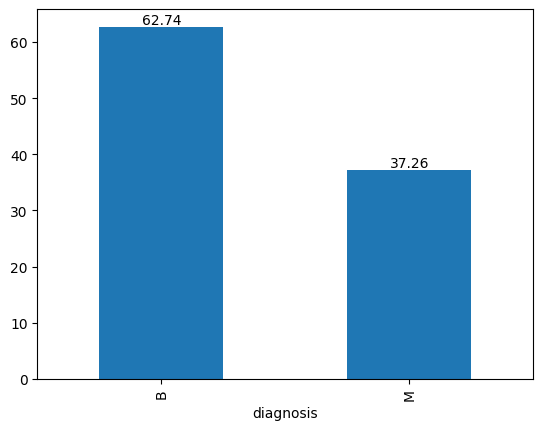

In [ ]:
# understand the target variable
ax = round(data['diagnosis'].value_counts(normalize=True)*100, 2).plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

# Target - Diagnosis
# M - malignant (cancer)
# B - Benign (non-cancer)


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# convert the target to binary
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# data variable split
x = data.iloc[:, 2:-1]
y = data['diagnosis']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# dimension of the split
print('Training data dimension:')
print(x_train.shape)
print(y_train.shape)
print('\nTesting data dimension:')
print(x_test.shape)
print(y_test.shape)

Training data dimension:
(398, 30)
(398,)

Testing data dimension:
(171, 30)
(171,)


In [ ]:
# Hyper parameter tuning for random forest

# using grid search
start_time = time.time()

rf_cv = RandomForestClassifier(random_state=42)
hyper_fit = GridSearchCV(rf_cv, cv=5,
                         param_grid={'criterion': ['gini', 'entropy'],
                                     'bootstrap': [True, False],
                                     'max_features': ['sqrt', 'log2', None, 'auto']},
                         n_jobs=-1)
hyper_fit.fit(x_train, y_train)
print('Best Parameters form the grid search:', hyper_fit.best_params_)

end_time = time.time()

print('Time taken for grid search:', round(end_time-start_time, 2), 's')

Best Parameters form the grid search: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
Time taken for grid search: 23.93 s


In [ ]:
# setting the best parameter to the model
best_params = hyper_fit.best_params_
final_model = RandomForestClassifier(**best_params, random_state=42)

In [ ]:
# OOB - Out of Bag
final_model.set_params(oob_score=True, warm_start=True, n_jobs=-1)

# trees
min_estimator = 15
max_estimator = 700

# error rate
error_rate = {}

# iteration the rf for the oob values wrt trees
for tree in range(min_estimator, max_estimator+1):
    final_model.set_params(n_estimators=tree)
    final_model.fit(x_train, y_train)
    oob_error = 1-final_model.oob_score_
    error_rate[tree] = oob_error

In [ ]:
# converting the dictionary to series
oob_data = pd.Series(error_rate)
oob_data

,0
15,0.052764
16,0.047739
17,0.045226
18,0.050251
19,0.052764
...,...
696,0.042714
697,0.042714
698,0.042714
699,0.042714


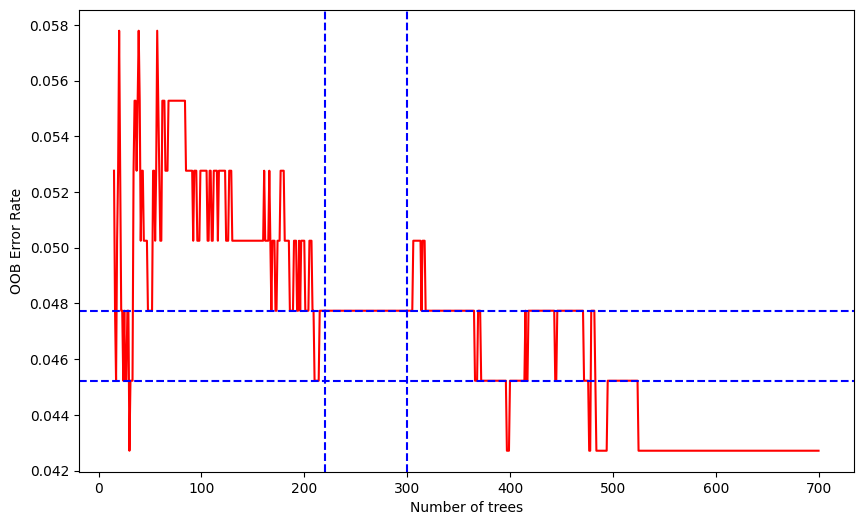

In [ ]:
# plotting the oob against the trees
plt.figure(figsize=(10, 6))
oob_data.plot(kind='line', color='r')
plt.xlabel('Number of trees')
plt.ylabel('OOB Error Rate')
plt.axhline(0.047739, color='b', ls='--')
plt.axhline(0.045226, color='b', ls='--')
plt.axvline(220, color='b', ls='--')
plt.axvline(300, color='b', ls='--')
plt.show()

In [ ]:
print(oob_data.loc[390:410])

390    0.045226
391    0.045226
392    0.045226
393    0.045226
394    0.045226
395    0.045226
396    0.045226
397    0.042714
398    0.042714
399    0.042714
400    0.045226
401    0.045226
402    0.045226
403    0.045226
404    0.045226
405    0.045226
406    0.045226
407    0.045226
408    0.045226
409    0.045226
410    0.045226
dtype: float64


<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', n_estimators=261, n_jobs=-1,
                       random_state=42)>

Training Score: 100.0 %
Testing Score: 97.08 %
Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



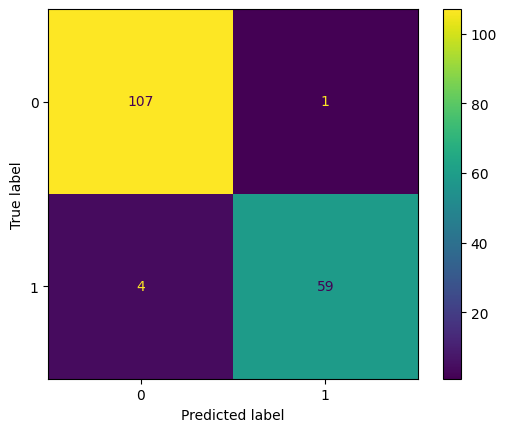

In [ ]:
# refining the trees via OOB
final_model.set_params(n_estimators=261, warm_start=False, oob_score=False, random_state=42)

# final model parameters
print(final_model.get_params)

# model training
final_model.fit(x_train, y_train)

# training score
print('\nTraining Score:', round(final_model.score(x_train, y_train)*100, 2), '%')

# predictions
y_pred = final_model.predict(x_test)

# metrics
print('Testing Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print('Classification Report:\n\n', classification_report(y_test, y_pred))

In [ ]:
# Variable Importance
importance = final_model.feature_importances_
importance

array([0.03548984, 0.01987122, 0.04057869, 0.03868013, 0.00685867,
       0.01397808, 0.06011028, 0.12218307, 0.00546386, 0.00601131,
       0.01607256, 0.00473847, 0.00975853, 0.02505396, 0.00551141,
       0.00765255, 0.00666392, 0.00670104, 0.00737566, 0.0077204 ,
       0.06855374, 0.02961475, 0.12227814, 0.11050976, 0.01343152,
       0.01746074, 0.0409879 , 0.12621271, 0.01757219, 0.00690488])

In [ ]:
# index of the above array
indx = np.argsort(importance)
indx

array([11,  8, 14,  9, 16, 17,  4, 29, 18, 15, 19, 12, 24,  5, 10, 25, 28,
        1, 13, 21,  0,  3,  2, 26,  6, 20, 23,  7, 22, 27])

In [ ]:
# list of independent variable
name_indx = list(x.columns)
name_indx

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
# dataframe for importance
impurity_df = pd.DataFrame({'mean_impurity': importance, 'column_index': indx})
impurity_df['column_name'] = impurity_df['column_index'].apply(lambda x: name_indx[x])
impurity_df = impurity_df[['column_name', 'mean_impurity']]
impurity_df = impurity_df.sort_values(by='mean_impurity', ascending=False)
impurity_df = impurity_df.reset_index(drop=True)
impurity_df['percentage_impurity'] = round(impurity_df['mean_impurity']*100, 3)
impurity_df['cum_impurity'] = impurity_df['percentage_impurity'].cumsum()
impurity_df

,column_name,mean_impurity,percentage_impurity,cum_impurity
0,concave points_mean,0.126213,12.621,12.621
1,perimeter_mean,0.122278,12.228,24.849
2,fractal_dimension_worst,0.122183,12.218,37.067
3,concavity_worst,0.110510,11.051,48.118
4,radius_mean,0.068554,6.855,54.973
5,smoothness_mean,0.060110,6.011,60.984
6,area_worst,0.040988,4.099,65.083
7,smoothness_se,0.040579,4.058,69.141
8,fractal_dimension_mean,0.038680,3.868,73.009
9,texture_se,0.035490,3.549,76.558


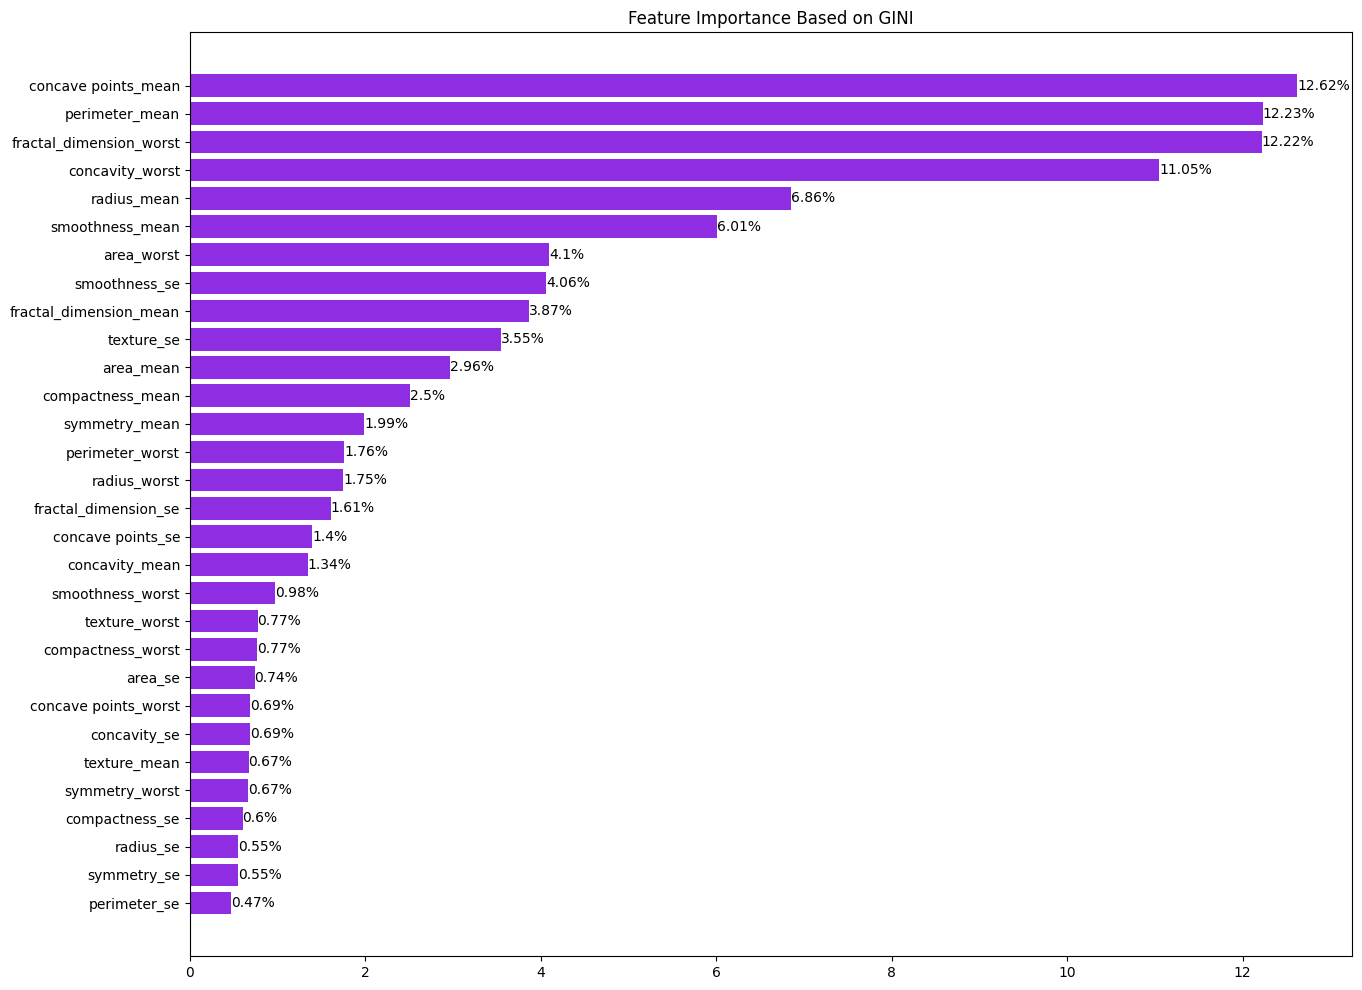

In [ ]:
# Feature importance graph
fig, ax = plt.subplots(figsize=(15, 12))
plt.title('Feature Importance Based on GINI')
plt.barh('column_name', 'percentage_impurity', data=impurity_df, align='center', color='#8e2de2')
for i, val in enumerate(impurity_df['percentage_impurity']):
    plt.text(val, i, f'{round(val, 2)}%', va='center', fontsize=10)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# filtering the columns with 90% mean impurity
final_columns = list(impurity_df[impurity_df['cum_impurity'] <= 90].column_name)

# filtering the x_train and x_test data for above columns
x_train_filtered = x_train[final_columns]
x_test_filtered = x_test[final_columns]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished



Training Score: 100.0 %
Testing Score: 97.66 %
Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



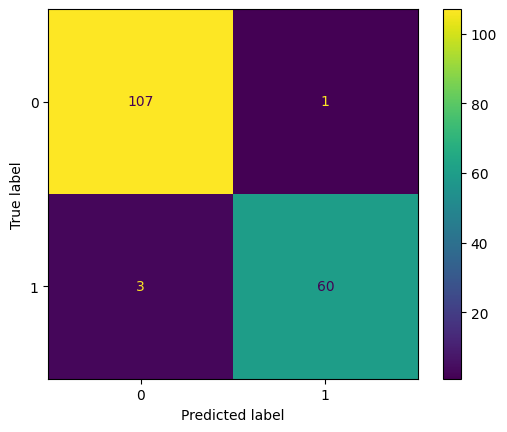

In [ ]:
# optimized model
final_params = final_model.get_params()
opt_model = RandomForestClassifier(**final_params)
opt_model.set_params(verbose=1)

# training the data
opt_model.fit(x_train_filtered, y_train)

# training score
print('\nTraining Score:', round(opt_model.score(x_train_filtered, y_train)*100, 2), '%')

# predictions
opt_y_pred = opt_model.predict(x_test_filtered)

# metrics
print('Testing Score:', round(accuracy_score(y_test, opt_y_pred)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, opt_y_pred)
print('Classification Report:\n\n', classification_report(y_test, opt_y_pred))

97.74
92.98
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



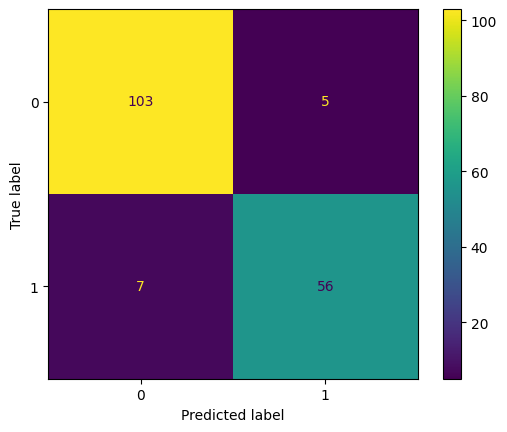

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(x_train_filtered, y_train)
print(round(dt.score(x_train_filtered, y_train)*100,2))

# Testing
dt_pred = dt.predict(x_test_filtered)
print(round(accuracy_score(y_test, dt_pred)*100,2))

# Confusion Matrix and report
cm = ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)
report = classification_report(y_test, dt_pred)
print(report)